# Gradient Boosting Regresor (GBR)

Algoritmo de aprendizaje supervisado utilizado para tareas de regresión, que se basa en la técnica de boosting. A diferencia de métodos como Random Forest, que construyen árboles de forma paralela, Gradient Boosting construye modelos secuencialmente, donde cada nuevo árbol trata de corregir los errores cometidos por el conjunto anterior.

El proceso se guía por el gradiente del error, de ahí su nombre.

Esta técnica permite construir modelos muy precisos, especialmente en problemas complejos con relaciones no lineales. Puede llegar a ser sensible al sobreajuste y requiere un ajuste cuidadoso de los hiperparámetros.

Carguemos las librerías para la realización del modelo.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

Carguemos el dataset a utilizar.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


Separemos entre variables numéricas y categóricas. Realicemos la separación entre datos de entrenamiento y validación.

In [ ]:
df = pd.read_csv(path + "/kc_house_data.csv")

num = ["sqft_living", "bathrooms", "lat", "long", "sqft_lot", "bedrooms", "yr_built"]
cat = ["zipcode", "waterfront", "condition", "grade"]

X = df[num + cat]
y = df["price"]

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)

Preprocesamiento de los datos.

In [ ]:
prep = ColumnTransformer([
    ("num", RobustScaler(), num),
    ("cat", OneHotEncoder(), cat)
])

Libería del modelo Gradient Boosting Regressor.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Métricas para evaluar las predicciones del modelo.

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

Construimos el modelo Gradient Boosting Regressor.

Entrenemoslo y realicemos la predicción.

In [ ]:
gbr = Pipeline([
    ("prep", prep),
    ("gbr", GradientBoostingRegressor(
        n_estimators=300, # Cantidad de árboles
        max_depth=3, # Profundidad de cada árbol
        learning_rate=0.05, # Tasa de aprendizaje (peso de cada árbol)
        random_state=42 # Semilla
    ))
])

gbr.fit(X_tr, y_tr)
pred_gbr = gbr.predict(X_te)
print("RMSE:", rmse(y_te, pred_gbr))
print("r2_score:", r2_score(y_te, pred_gbr))

RMSE: 143978.28427357815
r2_score: 0.8628773834746291


Notemos que en este caso obtuvimos el error más pequeño y el R^2 más alto de todos los modelos testeados anteriormente (ver todos los notebooks).

Visualicemos los árboles 1, 3, 25 y 50 del método.

In [ ]:
from sklearn.tree import plot_tree

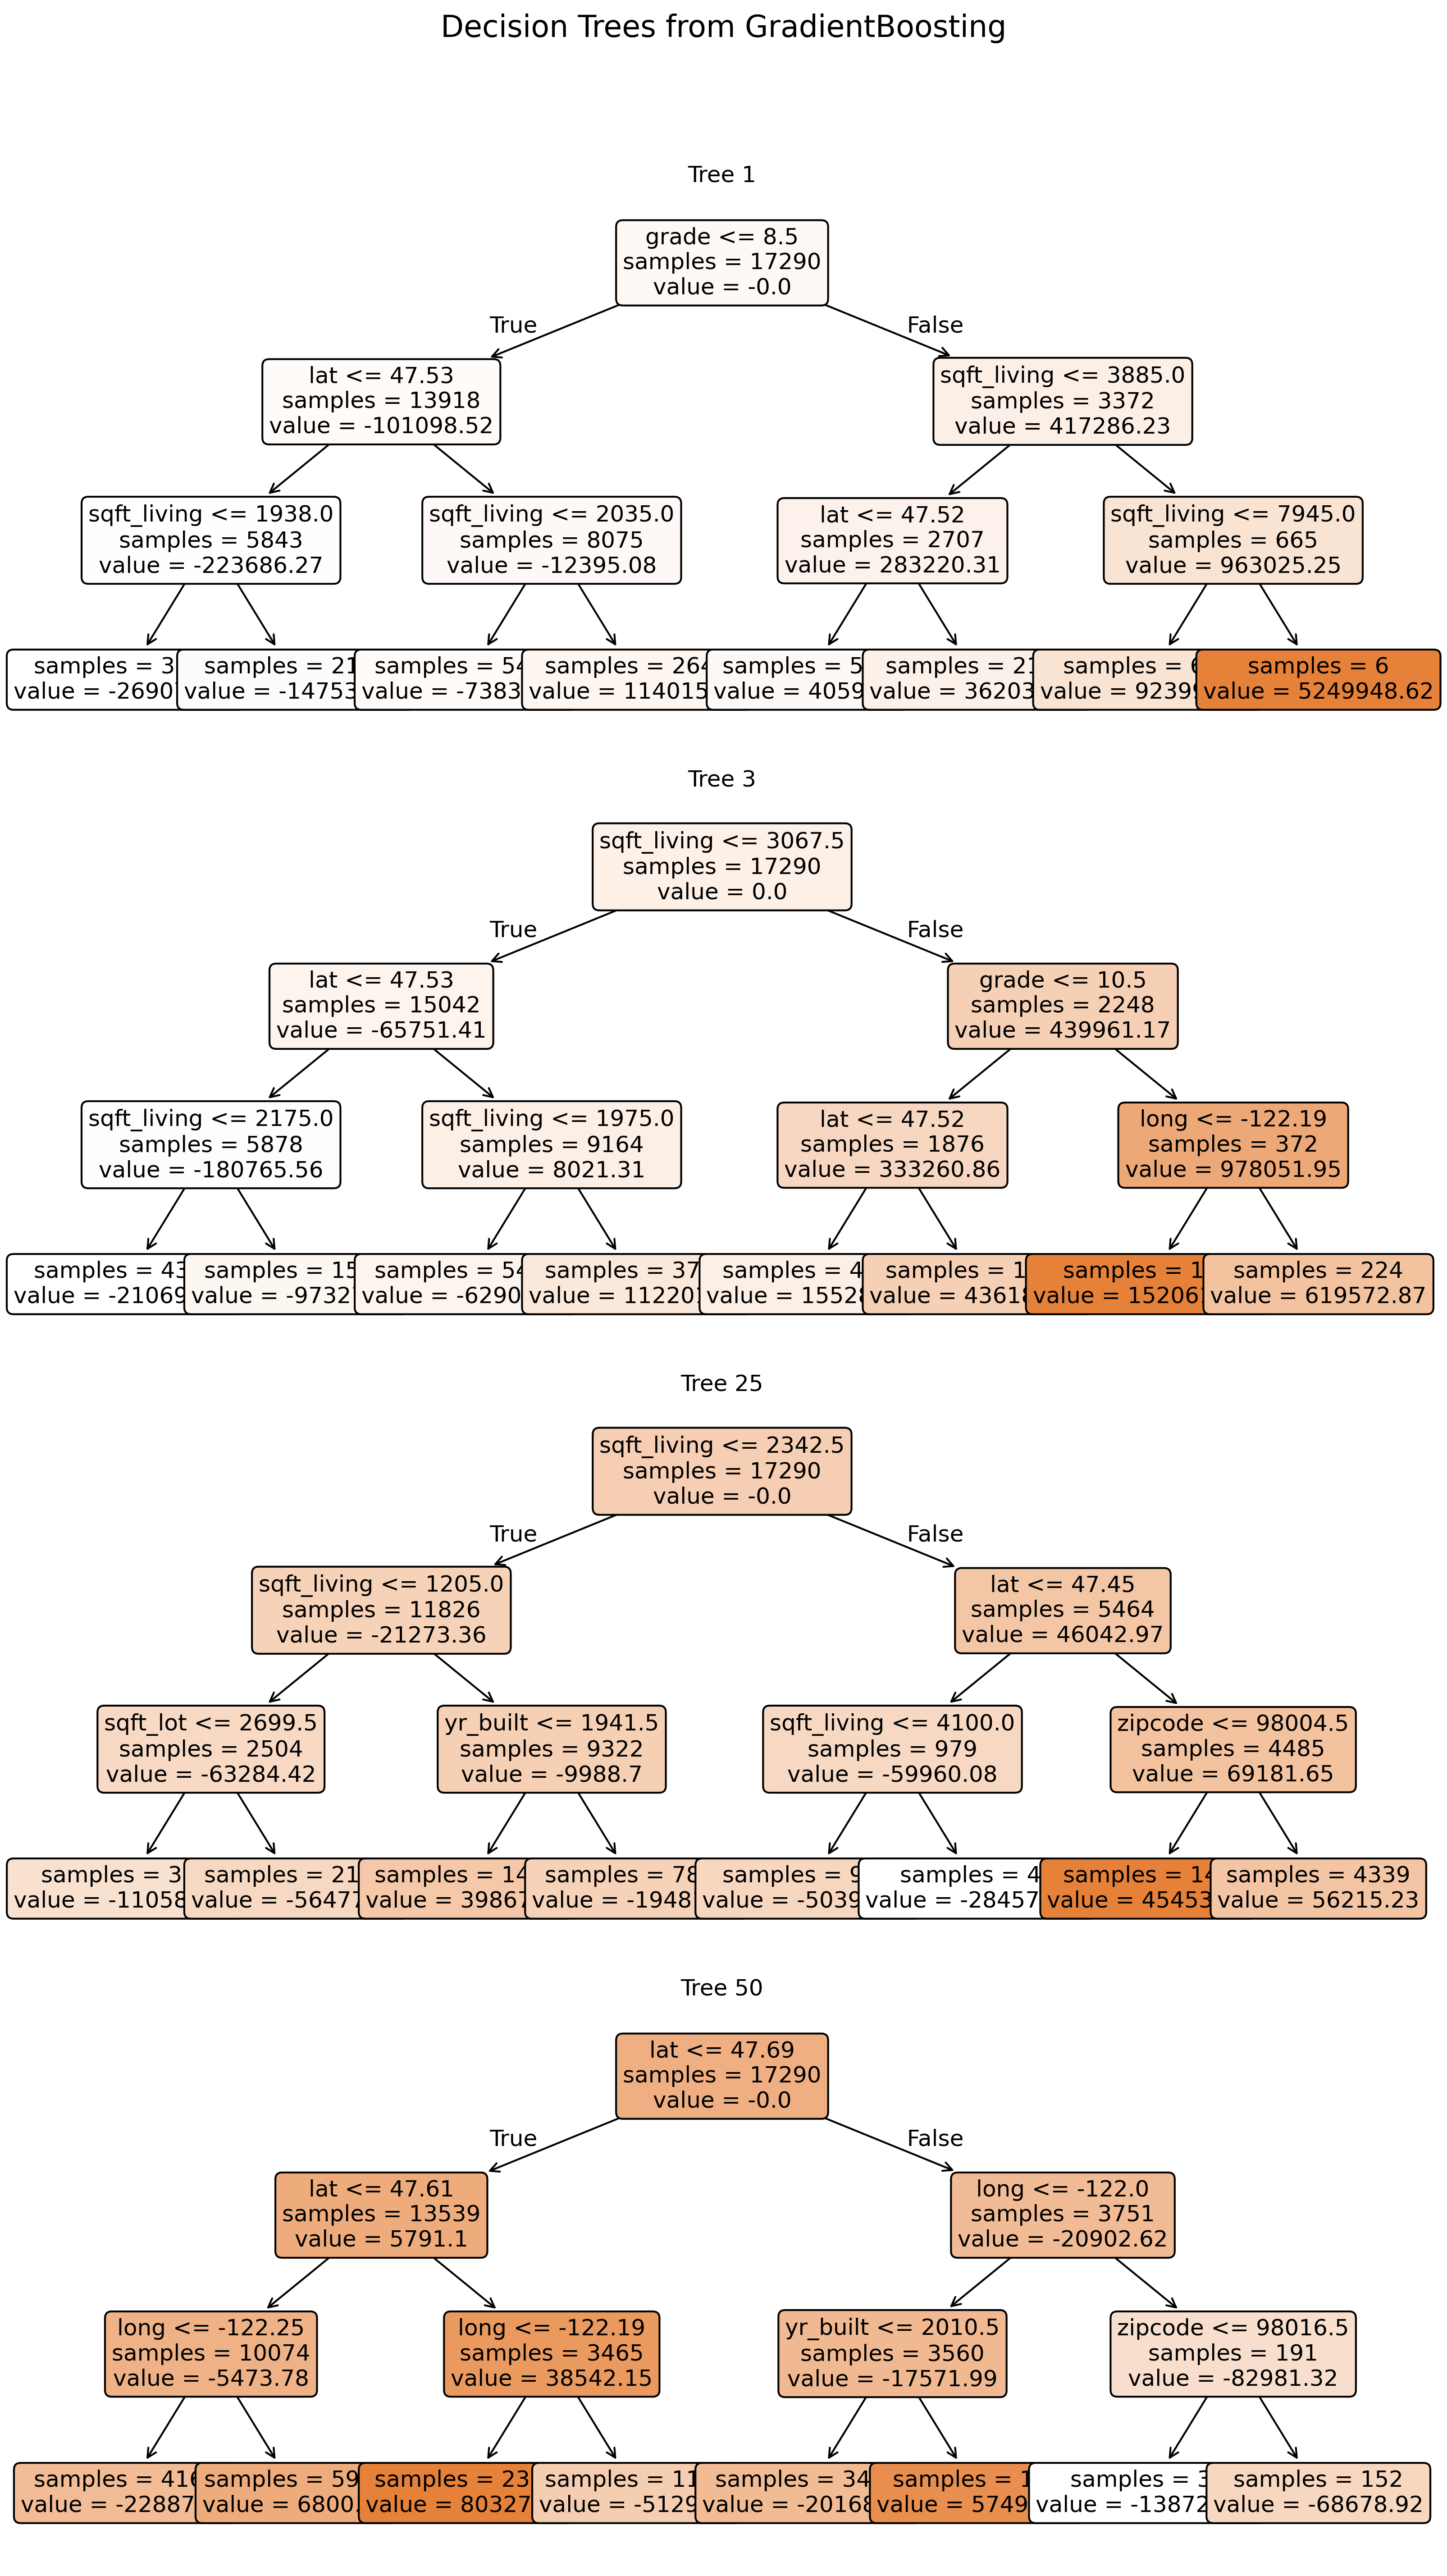

In [ ]:
# Train the model
clf = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, random_state=42)
clf.fit(X_tr, y_tr)

# Plot trees 1, 2, 49, and 50
plt.figure(figsize=(11, 20), dpi=300)

for i, tree_idx in enumerate([0, 2, 24, 49]):
    plt.subplot(4, 1, i+1)
    plot_tree(clf.estimators_[tree_idx,0],
              feature_names=X_tr.columns,
              impurity=False,
              filled=True,
              rounded=True,
              precision=2,
              fontsize=12)
    plt.title(f'Tree {tree_idx + 1}')

plt.suptitle('Decision Trees from GradientBoosting', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()